# EchoScope: Spotify Track Analysis & Recommendation System

## Data Visualization

Dataset: Spotify Track Dataset from Kaggle.

### Load the dataset.

In [1]:
import pandas as pd

tracks_df = pd.read_csv('dataset.csv')
tracks_df.head()

tracks_df.info() # Analyze the dataset.
tracks_df.describe() # Analyze the distributions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [2]:
# Group the main features of the dataset.

audio_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

categorical_features = [
    "explicit", "mode", "key", "time_signature"
]

### Visualize the dataset.

In [5]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


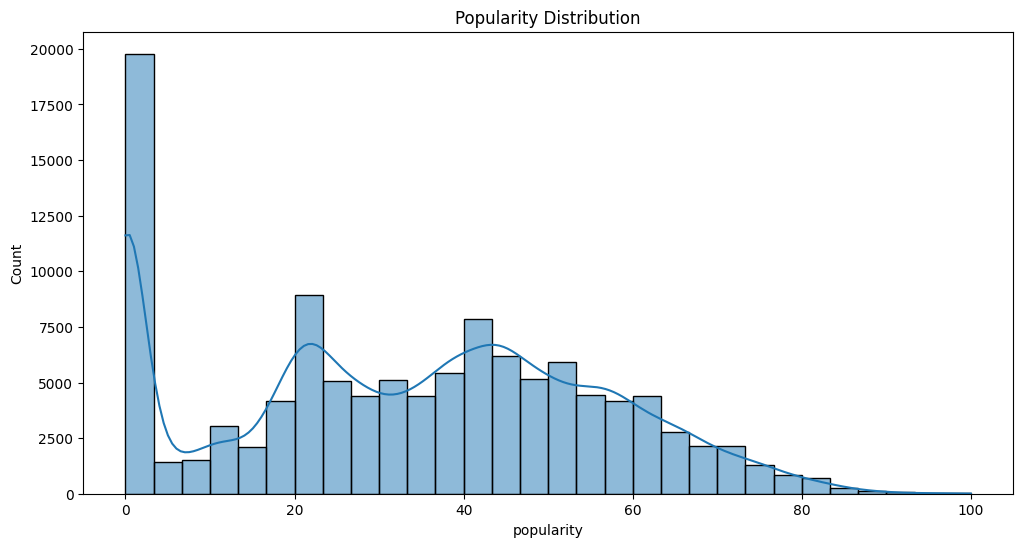

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(tracks_df["popularity"], bins=30, kde=True)
plt.title("Popularity Distribution")
plt.show()

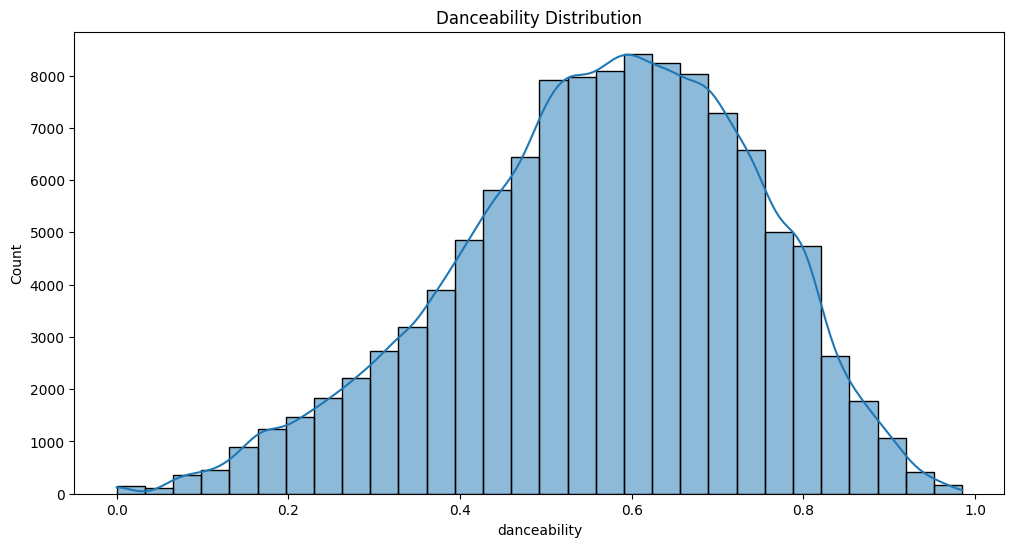

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(tracks_df["danceability"], bins=30, kde=True)
plt.title("Danceability Distribution")
plt.show()

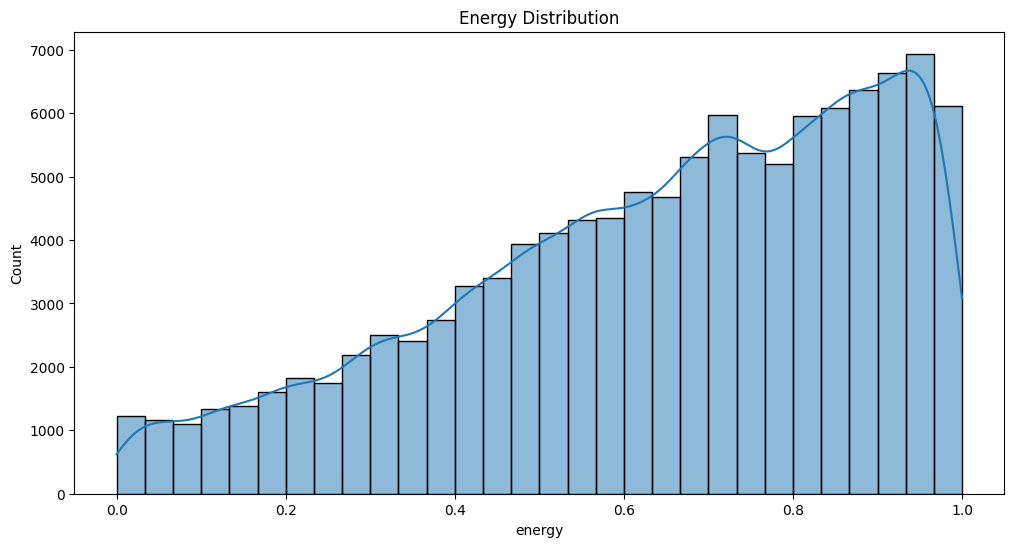

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(tracks_df["energy"], bins=30, kde=True)
plt.title("Energy Distribution")
plt.show()

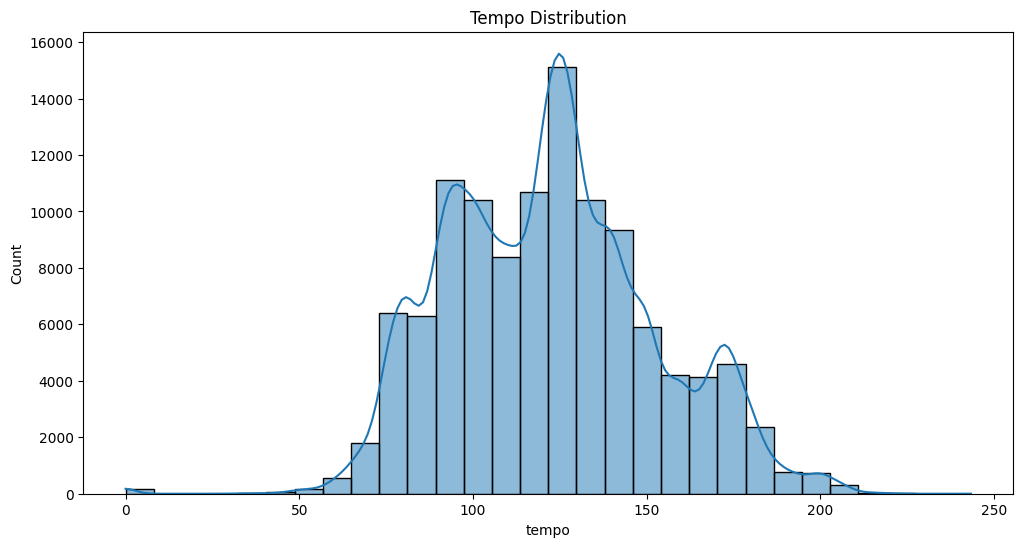

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(tracks_df["tempo"], bins=30, kde=True)
plt.title("Tempo Distribution")
plt.show()

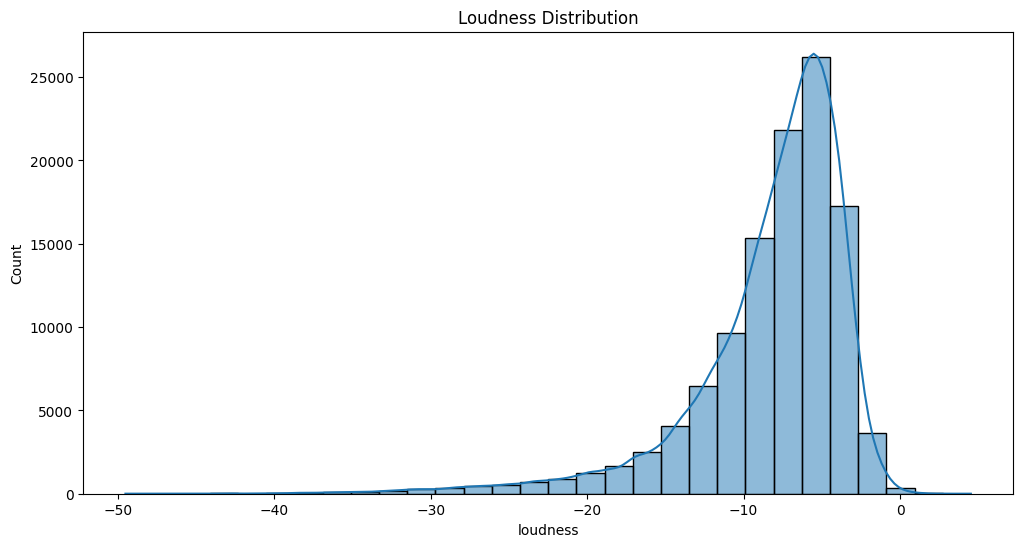

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(tracks_df["loudness"], bins=30, kde=True)
plt.title("Loudness Distribution")
plt.show()

Overall, the popularity distribution features many scores close to (or equal) zero. <br>
The other distributions, apart from tempo, seem to be left-skewed instead.

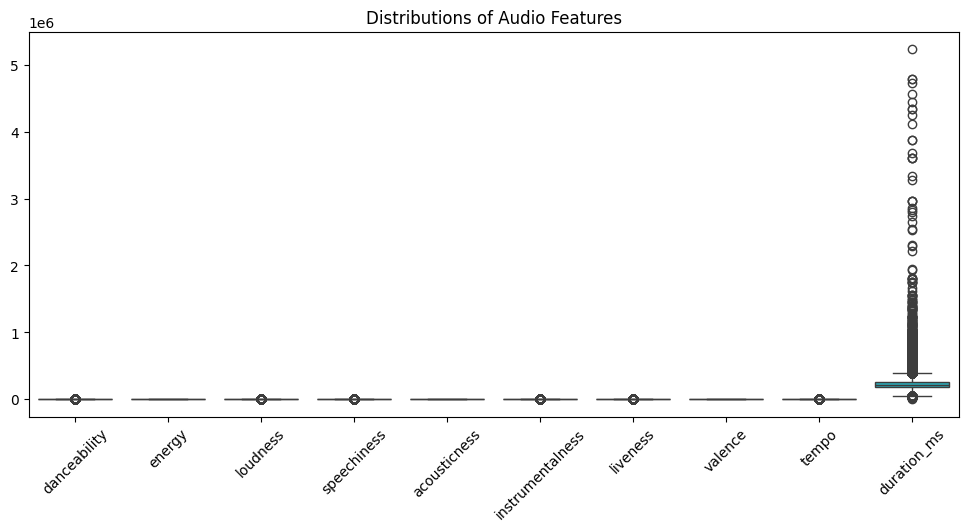

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(data=tracks_df[audio_features])
plt.xticks(rotation=45)
plt.title("Distributions of Audio Features")
plt.show()

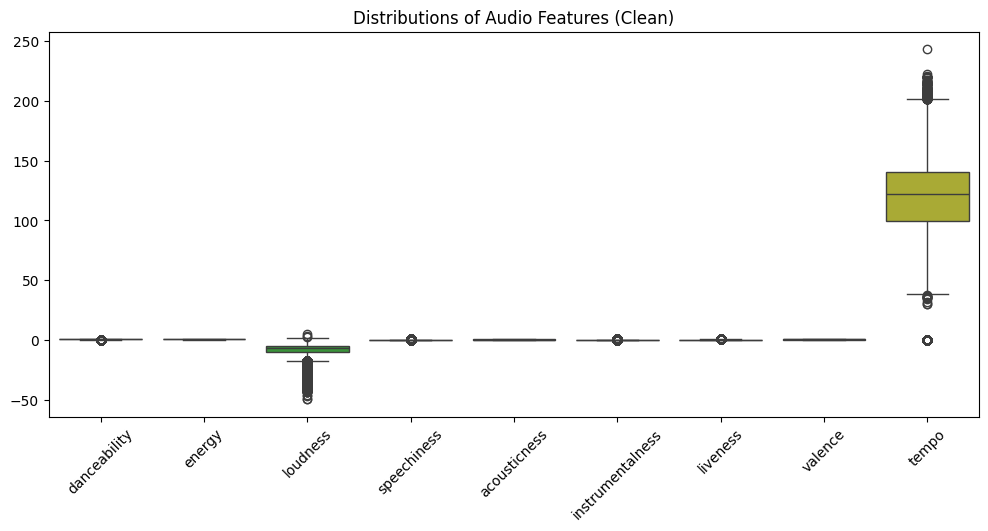

In [10]:
# Ignore durations for clearer visualization.

audio_features_2 = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"]

plt.figure(figsize=(12,5))
sns.boxplot(data=tracks_df[audio_features_2])
plt.xticks(rotation=45)
plt.title("Distributions of Audio Features (Clean)")
plt.show()

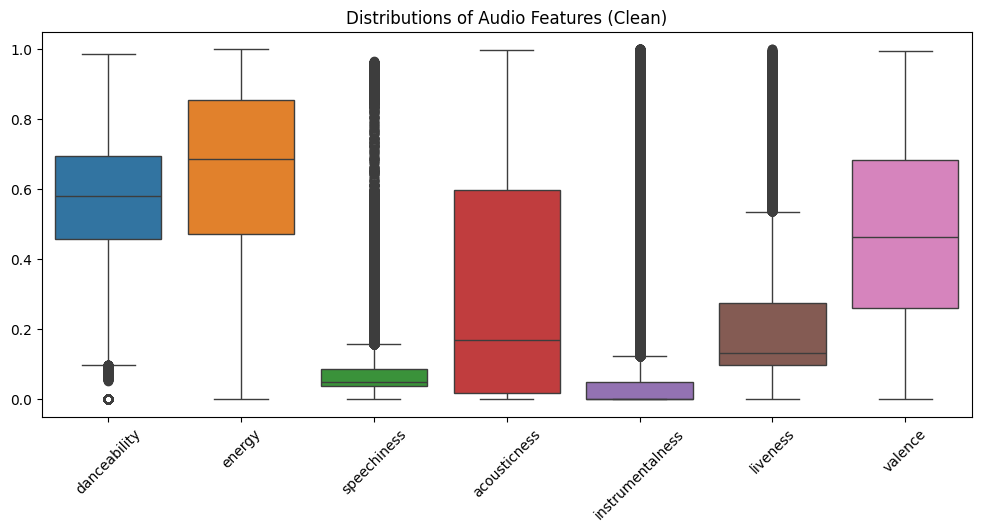

In [12]:
# Ignore tempo and loudness as well to visualize the remaining features with range [0, 1].

audio_features_3 = [
    "danceability", "energy", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence"]

plt.figure(figsize=(12,5))
sns.boxplot(data=tracks_df[audio_features_3])
plt.xticks(rotation=45)
plt.title("Distributions of Audio Features (Clean)")
plt.show()

Now, look at eventual patterns or correlations between these features.

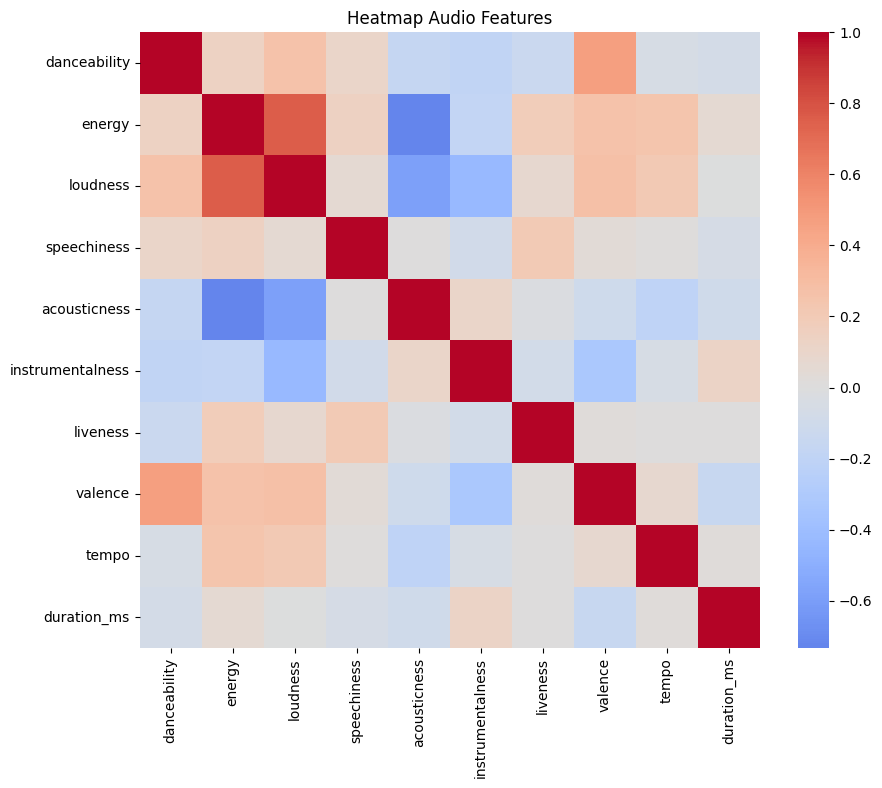

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(tracks_df[audio_features].corr(), cmap="coolwarm", center=0)
plt.title("Heatmap Audio Features")
plt.show()

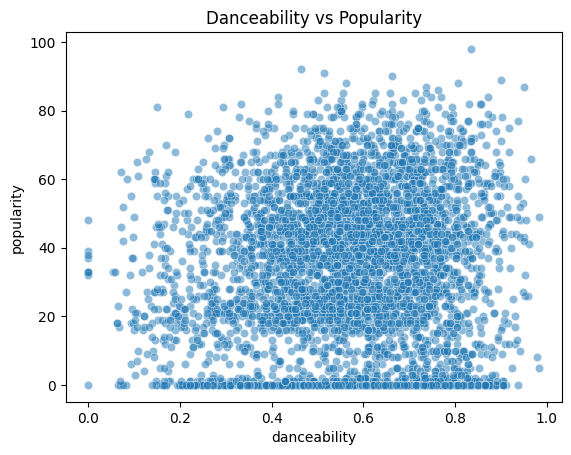

In [15]:
sns.scatterplot(
    x="danceability",
    y="popularity",
    data=tracks_df.sample(5000),
    alpha=0.5
)
plt.title("Danceability vs Popularity")
plt.show()

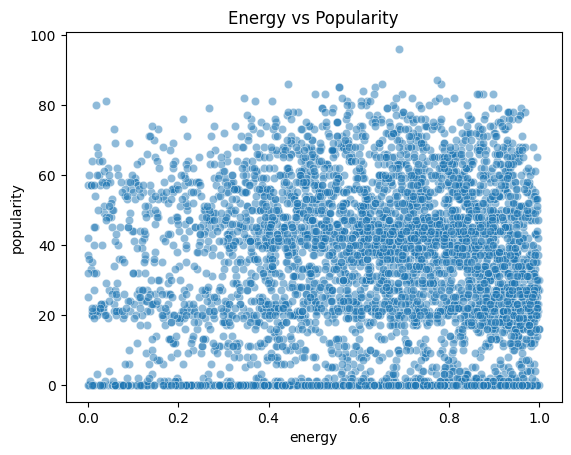

In [16]:
sns.scatterplot(
    x="energy",
    y="popularity",
    data=tracks_df.sample(5000),
    alpha=0.5
)
plt.title("Energy vs Popularity")
plt.show()

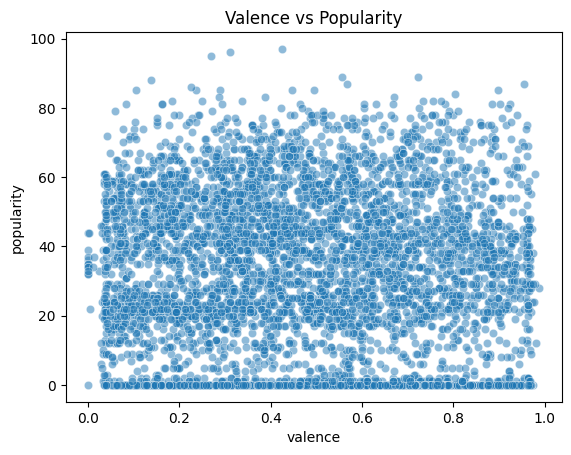

In [17]:
sns.scatterplot(
    x="valence",
    y="popularity",
    data=tracks_df.sample(5000),
    alpha=0.5
)
plt.title("Valence vs Popularity")
plt.show()

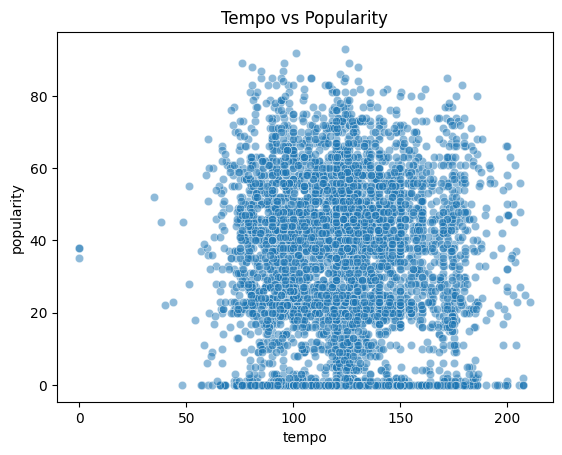

In [18]:
sns.scatterplot(
    x="tempo",
    y="popularity",
    data=tracks_df.sample(5000),
    alpha=0.5
)
plt.title("Tempo vs Popularity")
plt.show()

Lastly, analyze the genre distribution.

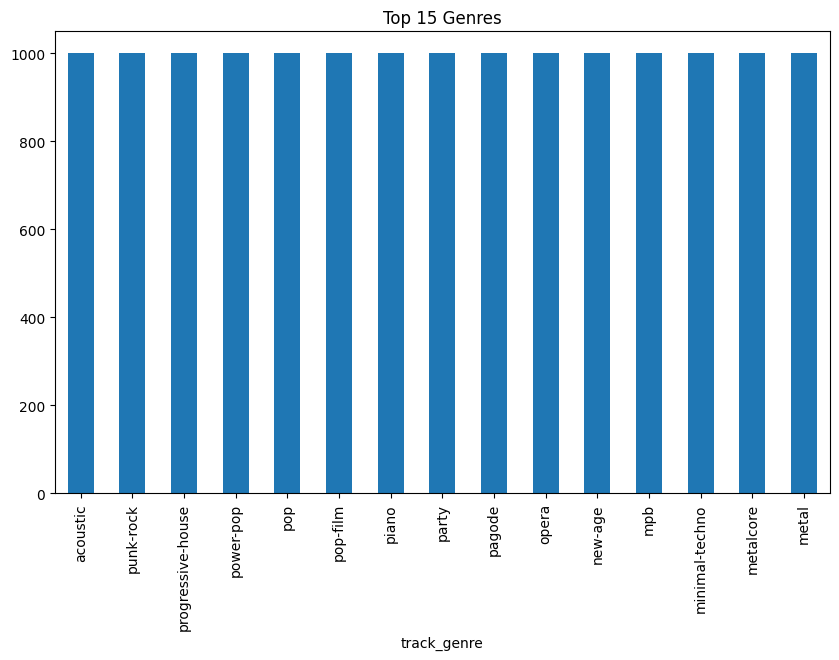

In [19]:
plt.figure(figsize=(10,6))
tracks_df["track_genre"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Genres")
plt.show()